#Objectives
* The primary objective of this notebook is to provide examples on ploting bathymetry in pan-Arctic and Candian Arctic Arichpolago (CAA) region. 
* This notebook also shows how to access data on HTTP sites, how to save and read data in \*.mat format (I am also a MATLAB user) and some ideas about dealing with colormaps and map projections. 
        Topography & bathymetry datasets applied in this notebook comes from NOAA-PMEL's ETOPO program 

# Content

1. [**Import modules & tools**](#Import-modules-&-tools)
1. [**Arctic & CAA topography/bathymetry in ETOPO2**](#Arctic-&-CAA-topography/bathymetry-in-ETOPO2)
  2. [Access data via NOAA-PMEL's HTTP site](#Access-data-via-NOAA-PMEL's-HTTP-site)
  2. [Extract Arctic & CAA by lat/lon pairs](#Extract-Arctic-&-CAA-by-lat/lon-pairs)
  2. [Save data as \*.mat format](#Save-data-as-*.mat-format)
1. [**Import Arctic & CAA ETOPO2 data**](#Import-Arctic-&-CAA-ETOPO2-data)
  2. [Get each variable](#Get-each-variable)
  2. [Resample the data](#Resample-the-data)
1. [**Set custom colormap**](#Set-custom-colormap)
1. [**Plot Arctic bathymetry**](#Plot-Arctic-bathymetry)
1. [**Plot Canadian Arctic Archipolago**](#Plot-Canadian-Arctic-Archipolago)

# Import modules & tools

In [1]:
import scipy.io
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as plt_cm
from __future__ import division
from __future__ import print_function
from mpl_toolkits.basemap import cm
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.basemap import shiftgrid
% matplotlib inline

In [2]:
__author__   = 'Yingkai Sha & CCAR Modeling Team'
__email__    = 'yingkai@eos.ubc.ca'

# Arctic & CAA topography/bathymetry in ETOPO2

## Access data via NOAA-PMEL's HTTP site

You **do not** need to run the code cell (currently they are RAW Convert) in this whole section if you clone the **`ETOPO2_Arctic.mat`** and **`ETOPO2_CAA.mat`**.

`netCDF` module can read data from a HTTP/FTP site, and do data will saved in your local directory.

## Extract Arctic & CAA by lat/lon pairs 

One can get a specific set of values from its parent arrary in Python as what it can be done in MATLAB  

## Save data as *.mat format

# Import Arctic & CAA ETOPO2 data

Examples about read \*.mat file and get valuables inside the file.

In [4]:
ETOPO2_Arctic=scipy.io.loadmat('_libs/ETOPO2_Arctic.mat')
ETOPO2_CAA=scipy.io.loadmat('_libs/ETOPO2_CAA.mat')

## Get each variable

In [111]:
#print(ETOPO2_Arctic)
lon_arctic=ETOPO2_Arctic['lon_arctic']
lat_arctic=ETOPO2_Arctic['lat_arctic']
topo_arctic=ETOPO2_Arctic['topo_arctic']
#print(ETOPO2_CAA)
lon_caa=ETOPO2_CAA['lon_caa']
lat_caa=ETOPO2_CAA['lat_caa']
topo_caa=ETOPO2_CAA['topo_caa']
# Get the range of CAA ETOPO file
print('Lat/Lon range of ETOPO_CAA')
print('=============================================')
print('Latitude range: {} ~ {}'.format(np.min(lat_caa), np.max(lat_caa)))
print('Longitude range: {} ~ {}'.format(np.min(lon_caa), np.max(lon_caa)))

Lat/Lon range of ETOPO_CAA
Latitude range: 50.0166664124 ~ 89.9833297729
Longitude range: -139.983337402 ~ -50.0166664124


## Resample the data

We resample the data to decrease the resolution, ETOPO2 has a resolution of 2km, and here the resampled resolution is`2 * res_unit (km)`.

Tips: mutipled topography by -1 and get the positive value of bathmetry.

In [112]:
#change resolustion from 2km to 10km
# res=2 * res_unit (km)
# Arctic
res_unit=1
lon_arctic=lon_arctic[0:-1:res_unit, 0:-1:res_unit]
lat_arctic=lat_arctic[0:-1:res_unit, 0:-1:res_unit]
topo_arctic=topo_arctic[0:-1:res_unit, 0:-1:res_unit]*-1 
# CAA
res_unit=1
lon_caa=lon_caa[0:-1:res_unit, 0:-1:res_unit]
lat_caa=lat_caa[0:-1:res_unit, 0:-1:res_unit]
topo_caa=topo_caa[0:-1:res_unit, 0:-1:res_unit]*-1

# Set custom colormap

Cell below creates a custom colormap for our bathmetry plot. Currently, `mpl_toolkits.basemap.cm.GMT_ocean` and `matplotlib.pyplot.cm.GnBu` 
are good choices, but the former is too dark and the later is too light. We combine the two choices to better the colormap's performance.
here is something interesting to learn:
* Each colormap contains a "color dictionary" list: `cdict={'blue':list, 'green':list, 'red':list}`. 
* Each `list` has three component: `x` for interpolation, `upper normalized color`, and `lower normalized color`, latter two are usually the same value.
* One can create colormap based on function `cmap_value=LinearSegmentedColormap('name', cdict)`.
* `x` in `cdict` **must starts from x=0 and end with x=1**
* `plt_cm.revcmap(cdict)` can revert the cdict and you can reverse your colormap, it is useful.

In [113]:
CMap_origin1=plt.cm.GnBu_r
CMap_origin2=cm.GMT_ocean
cdict={'blue':CMap_origin2._segmentdata['blue'][0:1]+CMap_origin1._segmentdata['blue'][3:9],\
       'green':CMap_origin2._segmentdata['green'][0:1]+CMap_origin1._segmentdata['green'][3:9],\
       'red':CMap_origin2._segmentdata['red'][0:1]+CMap_origin1._segmentdata['red'][3:9]}
cdict_r=plt_cm.revcmap(cdict)
custom_CMap=colors.LinearSegmentedColormap('arctic_ocean', cdict)
custom_CMap_r=colors.LinearSegmentedColormap('arctic_ocean_r', cdict_r)
# print a piece of colormap to make sure that it starts from x=0 and end with x=1
print(custom_CMap._segmentdata['blue'])

[(0.0, 0.0, 0.0), (0.375, 0.8274509906768799, 0.8274509906768799), (0.5, 0.7686274647712708, 0.7686274647712708), (0.625, 0.7098039388656616, 0.7098039388656616), (0.75, 0.772549033164978, 0.772549033164978), (0.875, 0.8588235378265381, 0.8588235378265381), (1.0, 0.9411764740943909, 0.9411764740943909)]


# Plot Arctic bathymetry

The cell below plots the bathymetry in Arctic, and there are some useful techniques in it:
* define extented colorbar by set `CMap.set_over()`, `CMap.set_under()` and then call `extend='both'` or sometimes `min` and `max`in `map.contourf`.
* Set `round=True` when create basemap axis to remove the default rectanglar frame.
* Set `lake_color=None` let inland waters share the same colormap as oceans.
* Call `CBar.ax.tick_params(axis='y', length=20)` to control the ticklength.
* Call `CBar.ax.invert_yaxis()` to reverse the colorbar (from large to small value). 
* Apply `papertype='a4'` and `bbox_inches='tight'` to make a quality control of the figure

Tips: **Do Not** save figure after `plt.show()`, you will get nothing.

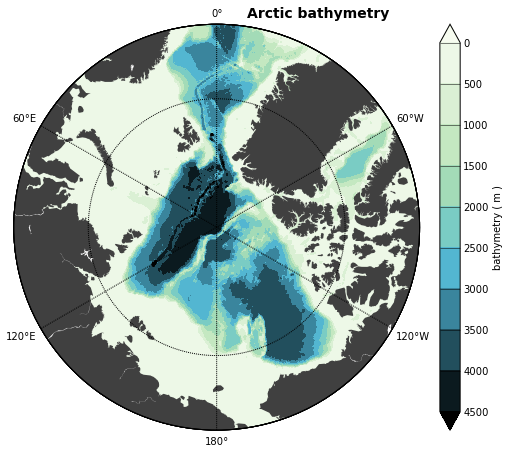

In [114]:
# Common
clevs=[0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500]
CMap=custom_CMap_r
CMap.set_over(CMap(np.arange(256))[-1, 0:3])
CMap.set_under(CMap(np.arange(256))[0, 0:3])
# Figureortho
map=Basemap(projection='npstere', resolution='l', \
            boundinglat=66.5, lon_0=-180, round=True)
# create figure, add axes
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
## define parallels and meridians to draw.
parallels=np.arange(-90, 90, 15)
meridians=np.arange(0, 360, 60)
map.drawparallels(parallels, labels=[1, 1, 1, 1],\
                  fontsize=10, latmax=90)
map.drawmeridians(meridians, labels=[1, 1, 1, 1],\
                  fontsize=10, latmax=90)
# draw coast & fill continents
map.fillcontinents(color=[0.25, 0.25, 0.25], lake_color=None) # coral
# compute native x,y coordinates of grid.
x, y=map(lon_arctic, lat_arctic)
# contourf the bathmetry
CS=map.contourf(x, y, topo_arctic, clevs, cmap=CMap, extend='both')
# colorbar
CBar=map.colorbar(CS, 'right', size='5%', pad='5%')
CBar.set_label('bathymetry ( m )', fontsize=10)
CBar.ax.tick_params(axis='y', length=20)
CBar.ax.invert_yaxis() 
# title
ax.set_title('Arctic bathymetry', x=1-0.25, y=1.005,\
             fontweight='bold', fontsize=14)
#plt.savefig('arctic.eps', dpi=600, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype='a4', format='eps',
#            transparent=True, bbox_inches='tight', pad_inches=0,
#            frameon=None)
#plt.savefig('_figures/01_Arctic_Bathymetry.png', dpi=600, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype='a4', format='png',
#            transparent=True, bbox_inches='tight', pad_inches=0,
#            frameon=None)
plt.show()

# Plot Canadian Arctic Archipolago 

The cell below plots the bathymetry in Canadian Arctic Archipolago (CAA), it is generally the same as the code cell above, but there are something special
to learn:
* "zomm in" a map based on a "reference projection" (see `ref_map` and `map` in the code block).
* Set `linewidth=0` in the `map.drawparallels` and `map.drawmeridians`, this is an awkward way to remove p/m line meanwhile preserve their label.
* One can set `levels=[your_value]` to draw a singe isoline through `map.contur`.
* Call `ticks=[a list]` in `map.colorbar` to customize your colorbar ticks.

*We ignore the place which is neither a part of CAA nor it is too deep.* 

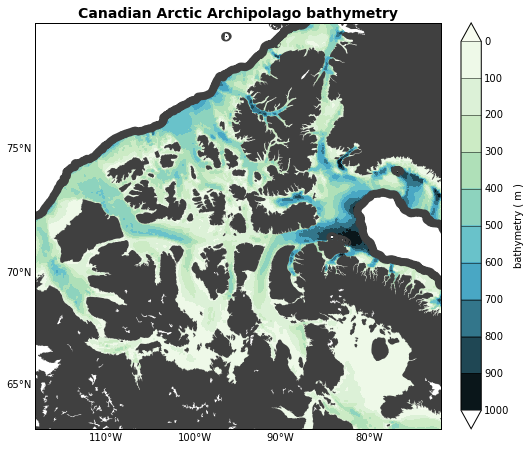

In [115]:
# Common
clevs=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
center_lat=75
center_lon=-95
coef=0.175
CMap=custom_CMap_r
CMap.set_over('w')
CMap.set_under(CMap(np.arange(256))[0, 0:3])
# Figure
ref_map=Basemap(projection='ortho',\
                lat_0=center_lat, lon_0=center_lon, resolution=None)
width=(ref_map.urcrnrx-ref_map.llcrnrx)*coef  
height=(ref_map.urcrnry-ref_map.llcrnry)*coef  
#width=width*coef 
#height=height*coef 
map=Basemap(projection='ortho',\
            lat_0=center_lat, lon_0=center_lon, resolution='i',\
            llcrnrx=-0.5*width, llcrnry=-0.5*height, \
            urcrnrx=0.5*width, urcrnry=0.5*height)
# create figure, add axes
fig=plt.figure(figsize=(8, 8))
ax=plt.gca()
# define parallels and meridians to draw.
parallels=np.arange(-90, 90, 5)
meridians=np.arange(0, 360, 10)
map.drawparallels(parallels, labels=[1, 0, 0, 0],\
                  linewidth=0.0, fontsize=10, latmax=90)
map.drawmeridians(meridians, labels=[0, 0, 0, 1],\
                  linewidth=0.0, fontsize=10, latmax=90)
# coast line & fill continents
map.fillcontinents(color=[0.25, 0.25, 0.25], lake_color=None) # coral
# compute native x,y coordinates of grid.
x, y=map(lon_caa, lat_caa)
CS=map.contourf(x, y, topo_caa, clevs, cmap=CMap, extend='both')
map.contour(x, y, topo_caa, levels=[1000],\
            linestyles='-', linewidths=8, colors=([0.25, 0.25, 0.25],))
CBar=map.colorbar(CS, 'right', ticks=clevs, size='5%', pad='5%')
CBar.set_label('bathymetry ( m )', fontsize=10)
CBar.ax.tick_params(axis='y', length=20)
CBar.ax.invert_yaxis() 
ax.set_title('Canadian Arctic Archipolago bathymetry',\
             fontweight='bold', fontsize=14)
#plt.savefig('caa.eps', dpi=600, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype='a4', format='eps',
#            transparent=True, bbox_inches='tight', pad_inches=0,
#            frameon=None)
#plt.savefig('_figures/01_CAA_Bathymetry.png', dpi=600, facecolor='w', edgecolor='w',
#            orientation='portrait', papertype='a4', format='png',
#            transparent=True, bbox_inches='tight', pad_inches=0,
#            frameon=None)
plt.show()